In [ ]:
pip install cdpkit

In [1]:
import CDPL.Chem as Chem

In [2]:
mol = Chem.BasicMolecule()

In [3]:
mol.numAtoms
# or
mol.getNumAtoms()

0

In [4]:
mol.numBonds
# or
mol.getNumBonds()

0

In [5]:
import CDPL.Vis

In [6]:
a = mol.addAtom()

In [7]:
Chem.setType(a, Chem.AtomType.C)

In [8]:
Chem.getType(a)

6

In [9]:
Chem.setType(mol.addAtom(), Chem.AtomType.C) # add second carbon atom

b = mol.addBond(0, 1)

In [10]:
Chem.setOrder(b, 2)

In [11]:
Chem.getOrder(b)

2

In [12]:
mol

In [13]:
# create missing atoms and set atom types
Chem.setType(mol.addAtom(), Chem.AtomType.C)
Chem.setType(mol.addAtom(), Chem.AtomType.C)
Chem.setType(mol.addAtom(), Chem.AtomType.C)
Chem.setType(mol.addAtom(), Chem.AtomType.N)

# create missing bonds and set orders
Chem.setOrder(mol.addBond(1, 2), 1)
Chem.setOrder(mol.addBond(2, 3), 2)
Chem.setOrder(mol.addBond(3, 4), 1)
Chem.setOrder(mol.addBond(4, 5), 2)
Chem.setOrder(mol.addBond(5, 0), 1)

In [14]:
mol.numBonds

6

In [15]:
mol.numAtoms

6

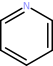

In [16]:
mol

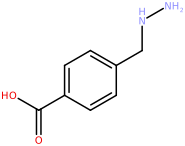

In [17]:
mol = Chem.parseSMILES('c1c(C(=O)O)ccc(CNN)c1')
mol

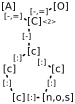

In [18]:
mol = Chem.parseSMARTS('c1:c:[n,o,s]:c:c:1-[C:2](-,=[*])-,=O')
mol

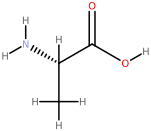

In [19]:
import CDPL.Base as Base

sdf_data = """5950
          12162506342D

 13 12  0     1  0  0  0  0  0999 V2000
    5.1350   -0.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690    1.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5369    0.2500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.4030   -0.2500    0.0000 C   0  0  1  0  0  0  0  0  0  0  0  0
    3.4030   -1.2500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.2690    0.2500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4030    0.3700    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.7830   -1.2500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.4030   -1.8700    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.0230   -1.2500    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0000   -0.0600    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5369    0.8700    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    5.6720    0.0600    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  6  1  0  0  0  0
  1 13  1  0  0  0  0
  2  6  2  0  0  0  0
  4  3  1  6  0  0  0
  3 11  1  0  0  0  0
  3 12  1  0  0  0  0
  4  5  1  0  0  0  0
  4  6  1  0  0  0  0
  4  7  1  0  0  0  0
  5  8  1  0  0  0  0
  5  9  1  0  0  0  0
  5 10  1  0  0  0  0
M  END
> <PUBCHEM_COMPOUND_CID>
5950

$$$$
"""

ios = Base.StringIOStream(sdf_data)

reader = Chem.MoleculeReader(ios, 'sdf')
# or
#reader = Chem.MoleculeReader(ios, Chem.DataFormat.SDF)
# or
#reader = Chem.SDFMoleculeReader(ios)

reader.read(mol)
mol

In [21]:
# Option 1
reader = Chem.MoleculeReader('/path/to/input/file.sdf')
# or
#reader = Chem.MoleculeReader('/path/to/input/file', 'smi')
# or
#reader = Chem.MoleculeReader('/path/to/input/file', Chem.DataFormat.SMILES)

# Option 2
reader = Chem.MoleculeReader(Base.FileIOStream('/path/to/input/file'), 'sdf')
# or
#reader = Chem.MoleculeReader(Base.FileIOStream('/path/to/input/file'), Chem.DataFormat.SDF)

# Option 3
reader = Chem.MOL2MoleculeReader(Base.FileIOStream('/path/to/input/file'))

# Option 4
reader = Chem.FileSDFMoleculeReader('/path/to/input/file')